### Import

In [1]:
import pandas as pd
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler
)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay 
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("../data/processed/processed_heart_disease_data.csv")

df

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,slope,num_of_vessels,thalassemia,diagnosis
0,63,1,typical angina,145,233,1,left ventricular hypertrophy,150,no,2.3,downsloping,0.0,fixed defect,0
1,67,1,asymptomatic,160,286,0,left ventricular hypertrophy,108,yes,1.5,flat,3.0,normal,1
2,67,1,asymptomatic,120,229,0,left ventricular hypertrophy,129,yes,2.6,flat,2.0,reversable defect,1
3,37,1,non-anginal pain,130,250,0,normal,187,no,3.5,downsloping,0.0,normal,0
4,41,0,atypical angina,130,204,0,left ventricular hypertrophy,172,no,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57,0,asymptomatic,140,241,0,normal,123,yes,0.2,flat,0.0,reversable defect,1
293,45,1,typical angina,110,264,0,normal,132,no,1.2,flat,0.0,reversable defect,1
294,68,1,asymptomatic,144,193,1,normal,141,no,3.4,flat,2.0,reversable defect,1
295,57,1,asymptomatic,130,131,0,normal,115,yes,1.2,flat,1.0,reversable defect,1


In [3]:
numeric_features = [
    "age", 
    "resting_blood_pressure", 
    "fasting_blood_sugar", 
    "cholesterol", 
    "max_heart_rate", 
    "st_depression", 
    "sex"
]
categorical_features = [
    "chest_pain_type", 
    "rest_ecg", 
    "exercise_induced_angina", 
    "slope", 
    "num_of_vessels", 
    "thalassemia"
]

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop="if_binary", handle_unknown="ignore")

# Column transformer
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (categorical_transformer, categorical_features)
)

preprocessor


ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['age', 'resting_blood_pressure',
                                  'fasting_blood_sugar', 'cholesterol',
                                  'max_heart_rate', 'st_depression', 'sex']),
                                ('onehotencoder',
                                 OneHotEncoder(drop='if_binary',
                                               handle_unknown='ignore'),
                                 ['chest_pain_type', 'rest_ecg',
                                  'exercise_induced_angina', 'slope',
                                  'num_of_vessels', 'thalassemia'])])

In [4]:


X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [5]:
preprocessor.verbose_feature_names_out = False

X_train_enc = pd.DataFrame(preprocessor.fit_transform(X_train), columns= preprocessor.get_feature_names_out())

X_train_enc

,age,resting_blood_pressure,fasting_blood_sugar,cholesterol,max_heart_rate,st_depression,sex,chest_pain_type_asymptomatic,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,...,slope_downsloping,slope_flat,slope_upsloping,num_of_vessels_0.0,num_of_vessels_1.0,num_of_vessels_2.0,num_of_vessels_3.0,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,1.429458,1.519207,-0.403635,0.707663,-1.724876,0.375999,0.661438,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-1.383259,-0.642139,-0.403635,0.874948,0.565533,-0.901327,0.661438,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.754406,0.870803,-0.403635,-0.835080,0.523118,-0.901327,0.661438,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.766985,1.303073,-0.403635,-0.054415,-0.240352,-0.901327,0.661438,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.529389,1.735342,2.477485,-1.336935,-2.488345,-0.049777,0.661438,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,1.204441,0.978871,-0.403635,-0.426160,-1.470386,-0.049777,-1.511858,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
203,1.204441,1.519207,-0.403635,2.083119,0.098968,-0.220087,-1.511858,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
204,-0.145663,0.330467,-0.403635,-0.258875,0.480703,-0.901327,-1.511858,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
205,-0.033155,0.168366,2.477485,1.042233,0.904853,-0.901327,-1.511858,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [6]:
X_train_enc.columns

Index(['age', 'resting_blood_pressure', 'fasting_blood_sugar', 'cholesterol',
       'max_heart_rate', 'st_depression', 'sex',
       'chest_pain_type_asymptomatic', 'chest_pain_type_atypical angina',
       'chest_pain_type_non-anginal pain', 'chest_pain_type_typical angina',
       'rest_ecg_ST-T wave abnormality',
       'rest_ecg_left ventricular hypertrophy', 'rest_ecg_normal',
       'exercise_induced_angina_yes', 'slope_downsloping', 'slope_flat',
       'slope_upsloping', 'num_of_vessels_0.0', 'num_of_vessels_1.0',
       'num_of_vessels_2.0', 'num_of_vessels_3.0', 'thalassemia_fixed defect',
       'thalassemia_normal', 'thalassemia_reversable defect'],
      dtype='object')

In [7]:
scoring = {
    "accuracy": 'accuracy',
    'precision': make_scorer(precision_score, pos_label=True),
    'recall': make_scorer(recall_score, pos_label=True),
    'f1': make_scorer(f1_score, pos_label=True),

}  

### Logistic Regression

In [8]:

cross_val_results = {}

logreg = make_pipeline(preprocessor, LogisticRegression(random_state = 123, max_iter = 1000))

cross_val_results['logreg'] = pd.DataFrame(cross_validate(logreg, X_train, y_train, scoring = scoring, return_train_score = True)).agg(['mean', 'std']).round(3).T

cross_val_results['logreg'] 

/Users/annanandar/miniforge3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,mean,std
fit_time,0.003,0.001
score_time,0.003,0.001
test_accuracy,0.841,0.068
train_accuracy,0.890,0.011
test_precision,0.850,0.092
train_precision,0.912,0.015
test_recall,0.820,0.057
train_recall,0.855,0.029
test_f1,0.834,0.068
train_f1,0.882,0.014


/Users/annanandar/miniforge3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


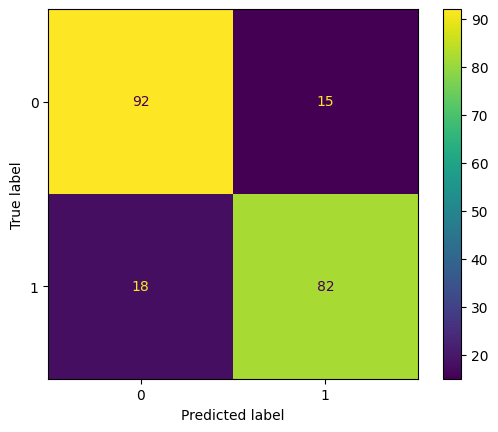

In [9]:
confmat_logreg = ConfusionMatrixDisplay.from_predictions(
    y_train,  # true class labels
    cross_val_predict(logreg, X_train, y_train),  # predicted class labels
)

In [10]:
logreg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['age',
                                                   'resting_blood_pressure',
                                                   'fasting_blood_sugar',
                                                   'cholesterol',
                                                   'max_heart_rate',
                                                   'st_depression', 'sex']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'),
                                                  ['chest_pain_type',
                                                   'rest_ecg',
                                                   'exercise_induced_angina',
                                                   'slope', 'num_of_vessels',
                                                   'thalassemia'])],
                                   verbose_feature_names_out=False)),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=123))])

In [11]:
logreg_model = logreg.named_steps['logisticregression']

In [12]:
feature_names = logreg.named_steps['columntransformer'].get_feature_names_out()

print("Intercept:", logreg_model.intercept_)

coefficients = pd.DataFrame(logreg_model.coef_.ravel(), index=feature_names, columns=['Coefficient'])

coefficients.sort_values(by='Coefficient', inplace=True, ascending=False)

Intercept: [0.14890597]


In [13]:
coefficients = pd.DataFrame({
    "Feature": feature_names,  
    "Coefficient": logreg_model.coef_.ravel()
})

coefficients = coefficients.sort_values(by="Coefficient", ascending=False)

coefficients.style.background_gradient(cmap="coolwarm", subset=["Coefficient"]).set_caption("Logistic Regression Coefficients")

,Feature,Coefficient
7,chest_pain_type_asymptomatic,1.242617
20,num_of_vessels_2.0,0.936761
24,thalassemia_reversable defect,0.908607
16,slope_flat,0.789179
6,sex,0.467793
1,resting_blood_pressure,0.464303
21,num_of_vessels_3.0,0.416970
5,st_depression,0.400422
12,rest_ecg_left ventricular hypertrophy,0.268959
14,exercise_induced_angina_yes,0.210783


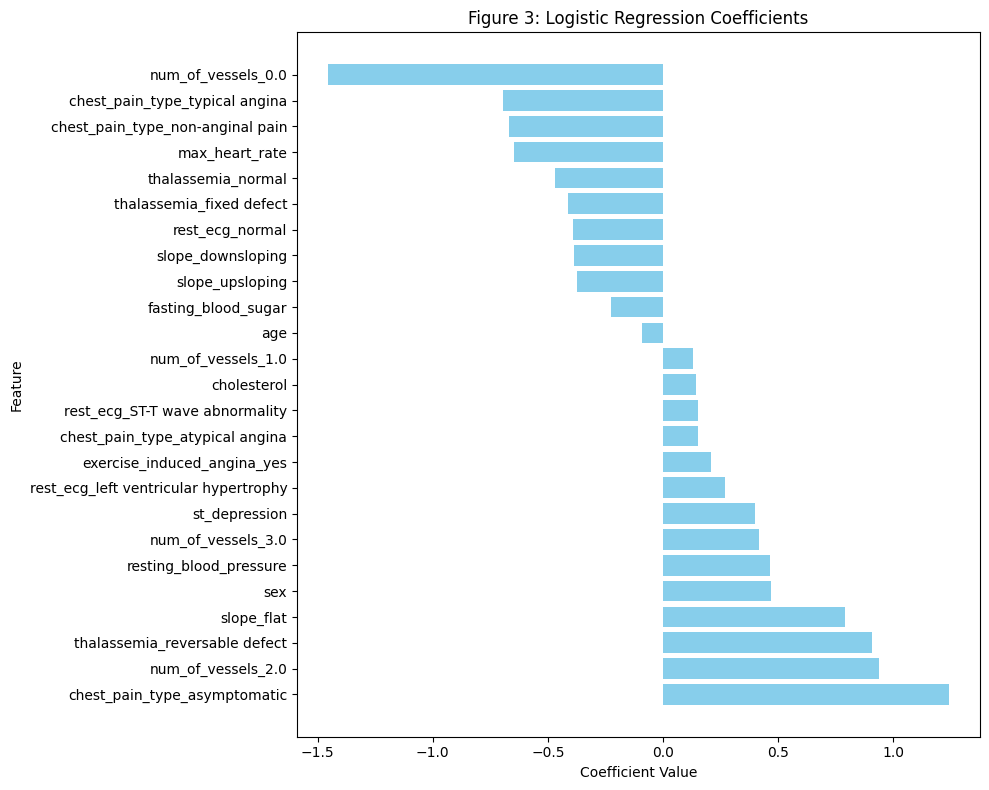

In [14]:
plt.figure(figsize=(10, 8))
plt.barh(coefficients["Feature"], coefficients["Coefficient"], color='skyblue')
plt.title("Figure 3: Logistic Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [15]:
pred = logreg.predict(X_test)


In [16]:
confusion_matrix(y_test,pred)

array([[45,  8],
       [ 8, 29]])

In [17]:
loges_report = classification_report(y_test, pred, output_dict=True)

loges_report_df = pd.DataFrame(loges_report).transpose()

loges_report_filtered = loges_report_df.loc[['0', '1', 'accuracy'], ['precision', 'recall', 'f1-score']]

loges_report_filtered

,precision,recall,f1-score
0,0.849057,0.849057,0.849057
1,0.783784,0.783784,0.783784
accuracy,0.822222,0.822222,0.822222


### Decision Tree Classifier

In [18]:
decision_tree = make_pipeline(preprocessor, DecisionTreeClassifier(random_state = 123))

decision_tree.fit(X_train, y_train)

decision_tree_result = decision_tree.predict(X_test)

In [19]:
confusion_matrix(y_test,decision_tree_result)

array([[37, 16],
       [ 6, 31]])

In [20]:
decision_tree_report = classification_report(y_test, decision_tree_result, output_dict=True)

decision_tree_report_df = pd.DataFrame(decision_tree_report).transpose()

decision_tree_report_filtered = decision_tree_report_df.loc[['0', '1', 'accuracy'], ['precision', 'recall', 'f1-score']]

decision_tree_report_filtered

,precision,recall,f1-score
0,0.860465,0.698113,0.770833
1,0.659574,0.837838,0.738095
accuracy,0.755556,0.755556,0.755556
